Dataset Source: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

Description:
The purpose is to try predict the future bike shares.
    
Details:
"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"wind_speed" - wind speed in km/h
"weather_code" - category of the weather
"is_holiday" - boolean field - 1 holiday / 0 non holiday
"is_weekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
"weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
2 = scattered clouds / few clouds 
3 = Broken clouds 
4 = Cloudy 
7 = Rain/ light Rain shower/ Light rain 
10 = rain with thunderstorm 
26 = snowfall 
94 = Freezing Fog

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("london_merged.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


array([[<AxesSubplot:title={'center':'cnt'}>,
        <AxesSubplot:title={'center':'t1'}>,
        <AxesSubplot:title={'center':'t2'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'weather_code'}>],
       [<AxesSubplot:title={'center':'is_holiday'}>,
        <AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'season'}>]], dtype=object)

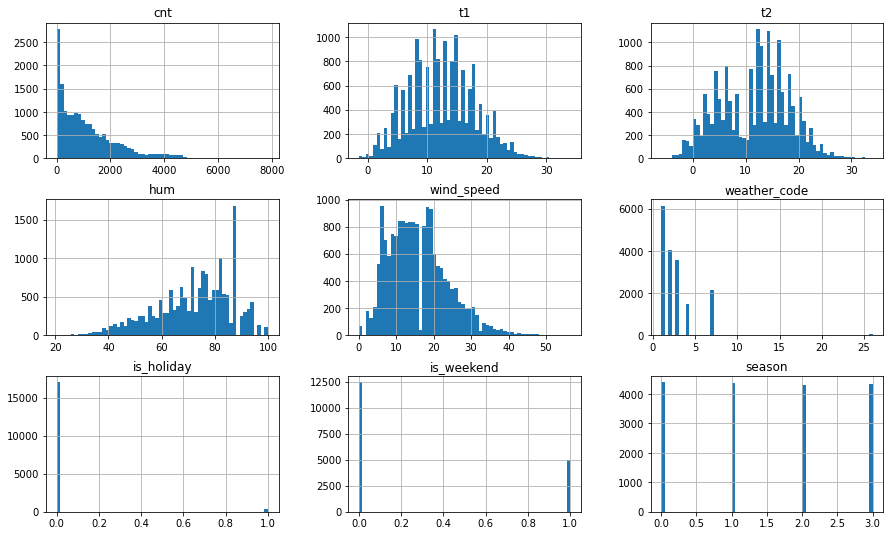

In [6]:
df.hist(bins = 60, figsize = (15,9))

<AxesSubplot:>

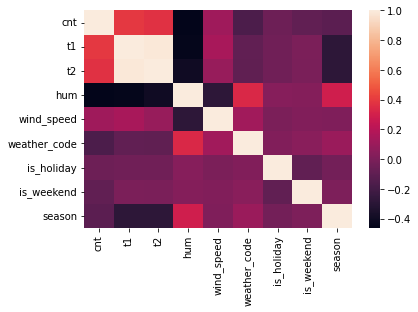

In [7]:
sns.heatmap(df.corr())

In [8]:
season_dict = {
    '0.0' : 'Spring',
    '1.0' : 'Summer',
    '2.0' : 'Autumn',
    '3.0' : 'Winter'
}

weather_dict = {
    '1.0' : 'Clear',
    '2.0' : 'Scattered Clouds',
    '3.0' : 'Broken Clouds',
    '4.0' : 'Cloudy',
    '7.0' : 'Rain',
    '10.0' : 'Rain with Thunderstorm',
    '26.0' : 'Snowfall'
}

df.season = df.season.astype("str")
df.season = df.season.map(season_dict)
df.weather_code = df.weather_code.astype("str")
df.weather_code = df.weather_code.map(weather_dict)

In [9]:
new_cols_dict = {
    'timestamp' : 'time',
    'cnt' : 'count',
    't1' : 'temp_real_C',
    't2' : 'temp_feels_like_C',
    'hum' : 'humidity_percent',
    'wind_speed' : 'wind_speed_kph',
    'weather_code' : 'weather',
    'is_holiday' : 'is_holiday',
    'is_weekend' : 'is_weekend',
    'season' : 'season'
}

df.rename(new_cols_dict, axis = 1, inplace = True)

In [10]:
df.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0.0,1.0,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter


In [12]:
df.to_csv("clean_data.csv", index = False)